In [1]:
%run Machinery.ipynb
set_plot_style(usetex=False)

Mon Apr 12 21:48:36 CST 2021
Running with pystan version v.2.19.1.1
3.8.8 | packaged by conda-forge | (default, Feb 20 2021, 16:22:27) 
[GCC 9.3.0]
2021-04-12T21:48:39+08:00

CPython 3.8.8
IPython 7.21.0

pandas 1.2.3
pystan 2.19.1.1
arviz 0.11.2

compiler   : GCC 9.3.0
system     : Linux
release    : 4.4.0-21301-Microsoft
machine    : x86_64
processor  : x86_64
CPU cores  : 12
interpreter: 64bit


In [2]:
folder = './stan_files'
posterior_glob = !cd {folder}; ls offspring_distribution*
print(folder + " | " + "number of chains: %d"%len(posterior_glob))
cmdstan_data = az.from_cmdstan(posterior = [folder+"/"+x for x in posterior_glob])

./stan_files | number of chains: 4


In [3]:
posterior_glob

['offspring_distribution-1.csv',
 'offspring_distribution-2.csv',
 'offspring_distribution-3.csv',
 'offspring_distribution-4.csv']

In [4]:
!ls {folder}

df_IDs.csv			 offspring_distribution-1.csv
gt_offspring_distribution-1.csv  offspring_distribution-2.csv
gt_offspring_distribution-2.csv  offspring_distribution-3.csv
gt_offspring_distribution-3.csv  offspring_distribution-4.csv
gt_offspring_distribution-4.csv


In [5]:
cmdstan_data.posterior.infector

<xarray.DataArray 'infector' (chain: 4, draw: 2500, infector_dim_0: 21)>
array([[[ 1.,  2.,  2., ..., 17., 11., 19.],
        [ 1.,  2.,  2., ..., 17., 11., 19.],
        [ 1.,  2.,  2., ..., 17., 11., 19.],
        ...,
        [ 1.,  2.,  2., ..., 17.,  3., 19.],
        [ 1.,  2.,  2., ..., 17., 11., 19.],
        [ 1.,  2.,  2., ..., 17., 11., 19.]],

       [[ 1.,  2.,  2., ..., 17., 11., 20.],
        [ 1.,  2.,  2., ..., 17., 11., 17.],
        [ 1.,  2.,  2., ..., 17., 11., 17.],
        ...,
        [ 1.,  2.,  2., ..., 17., 11., 20.],
        [ 1.,  2.,  2., ..., 17., 11., 19.],
        [ 1.,  2.,  2., ..., 17., 11., 17.]],

       [[ 1.,  2.,  2., ..., 17., 11., 17.],
        [ 1.,  2.,  2., ..., 17., 11., 20.],
        [ 1.,  2.,  2., ..., 17.,  3., 17.],
        ...,
        [ 1.,  2.,  2., ..., 17., 11., 19.],
        [ 1.,  2.,  2., ..., 17., 11., 17.],
        [ 1.,  2.,  2., ..., 17.,  3., 19.]],

       [[ 1.,  2.,  2., ..., 17., 11., 17.],
        [ 1.,  2.,  2., ..., 17., 11., 19.],
        [ 1.,  2.,  2., ..., 17., 11., 20.],
        ...,
        [ 1.,  2.,  2., ..., 17., 11., 20.],
        [ 1.,  2.,  2., ..., 17., 11., 19.],
        [ 1.,  2.,  2., ..., 17.,  3., 20.]]])
Coordinates:
  * chain           (chain) int64 0 1 2 3
  * draw            (draw) int64 0 1 2 3 4 5 6 ... 2494 2495 2496 2497 2498 2499
  * infector_dim_0  (infector_dim_0) int64 0 1 2 3 4 5 6 ... 15 16 17 18 19 20

In [6]:
infectors = np.vstack(cmdstan_data.posterior.infector.values)
infectors

array([[ 1.,  2.,  2., ..., 17., 11., 19.],
       [ 1.,  2.,  2., ..., 17., 11., 19.],
       [ 1.,  2.,  2., ..., 17., 11., 19.],
       ...,
       [ 1.,  2.,  2., ..., 17., 11., 20.],
       [ 1.,  2.,  2., ..., 17., 11., 19.],
       [ 1.,  2.,  2., ..., 17.,  3., 20.]])

In [7]:
!ls {folder}

df_IDs.csv			 offspring_distribution-1.csv
gt_offspring_distribution-1.csv  offspring_distribution-2.csv
gt_offspring_distribution-2.csv  offspring_distribution-3.csv
gt_offspring_distribution-3.csv  offspring_distribution-4.csv
gt_offspring_distribution-4.csv


In [8]:
df_IDs = pd.read_csv(folder+"/df_IDs.csv")
df_IDs

,number,ID,day
0,1,A0,5
1,2,B1.1,15
2,3,B1.2,16
3,4,B2,21
4,5,B3,23
5,6,B4.1,21
6,7,B4.2,21
7,8,B4.3,25
8,9,B5,24
9,10,B6,23


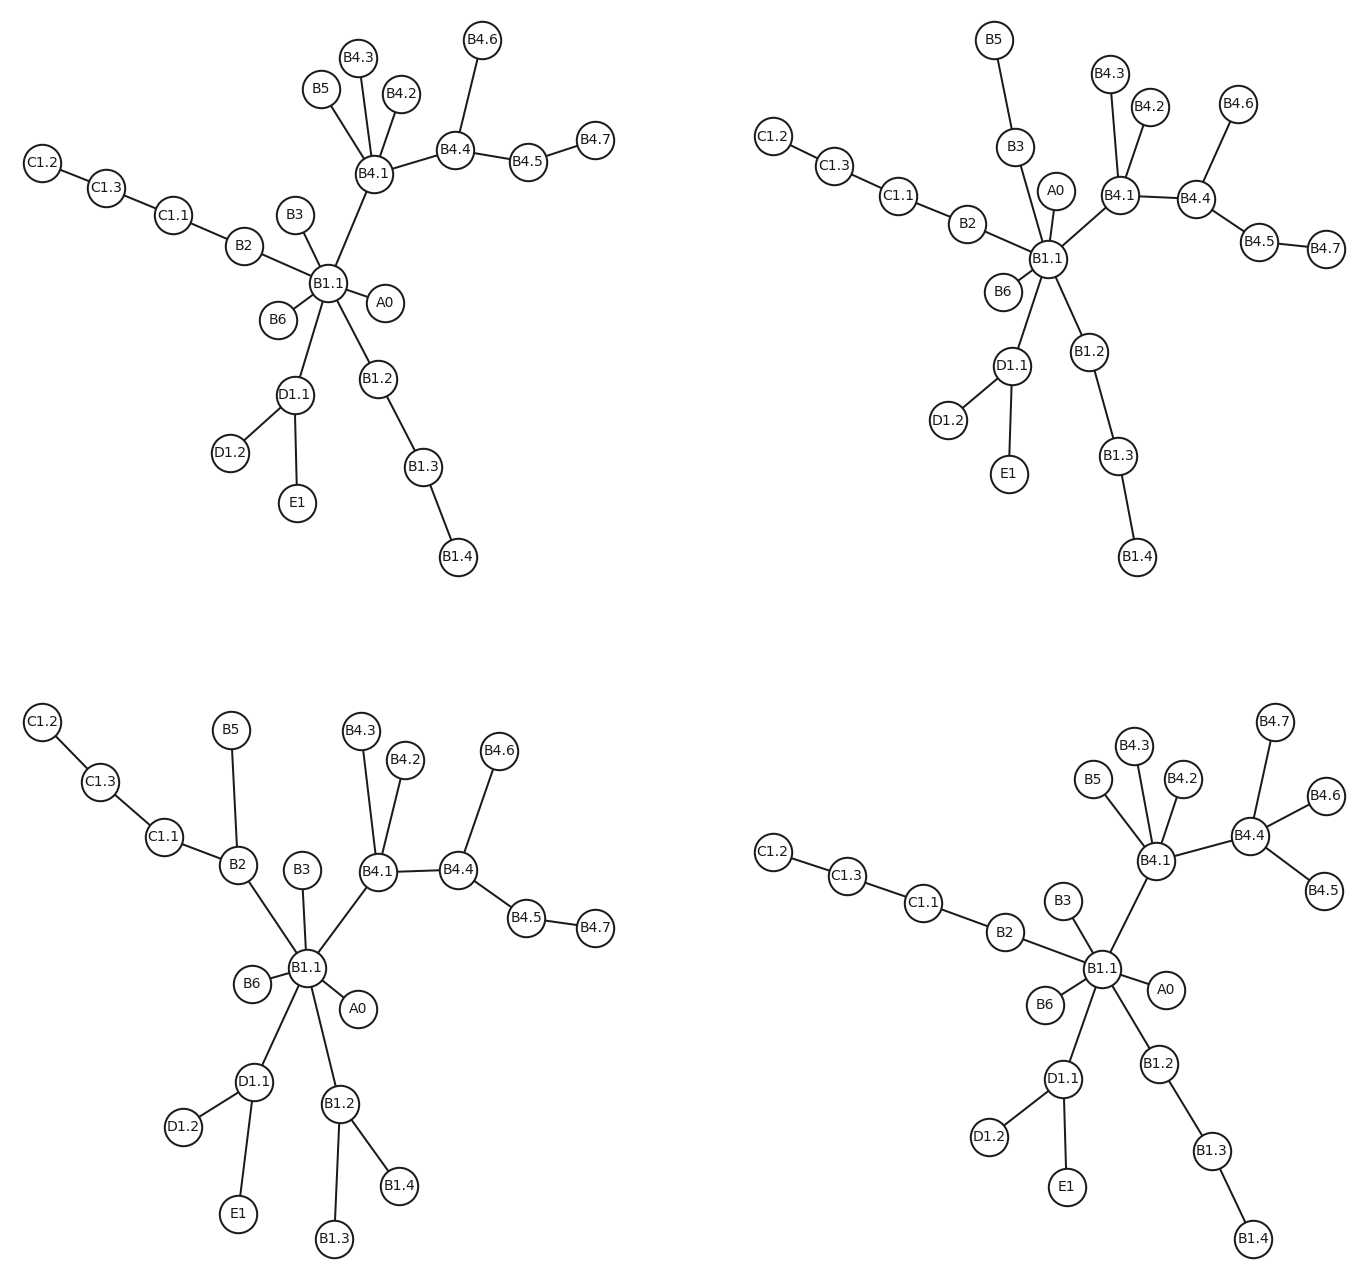

In [9]:
fig, axs = plt.subplots(2,2,figsize=(12, 11.5))
for idx in range(4):
    res_ = infectors[idx+4]
    connections = [(df_IDs.loc[lambda d: d.number==x+2].ID.values[0], df_IDs.loc[lambda d: d.number==int(y)].ID.values[0]) for x,y in enumerate(res_) if y>=0]
    G = nx.Graph()
    G.add_edges_from(connections)

    ax = axs[idx//2,idx%2]
    nx.draw(G, pos=nx.kamada_kawai_layout(G), with_labels = True, edgecolors = 'k', 
            ax = ax, node_size = 350, node_color = 'w', font_color = 'k', font_size=7, width = 1);

my_dpi = 300
plt.savefig("../../figures/draft/AppendixFigure6.pdf",
            format='pdf',
            dpi=my_dpi,
            bbox_inches='tight');

In [10]:
W_probs_ = cmdstan_data.posterior.W_probs[0][7].values

In [11]:
param1 = cmdstan_data.posterior.si_par1[0][7].values
param2 = cmdstan_data.posterior.si_par2[0][7].values
print(cmdstan_data.posterior.si_mean[0][7].values)

5.1765


In [12]:
distr = ss.weibull_min(param1, scale=param2)
xstep=1
X = np.arange(0,24,xstep)
Y = [distr.cdf(xx+xstep/2)-distr.cdf(xx-xstep/2) for xx in X]

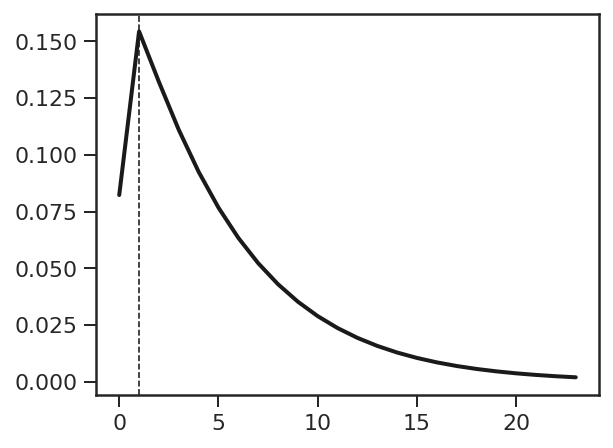

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(4.5,3.5); 

ax.plot(X, Y, lw=2, c='k');
ax.axvline(1, color='k', lw=.8, ls='dashed', zorder=-5);

In [14]:
%%time
Reffs = None
generations = None
Reff_by_gen = None
GEN_MAX = 6
for idx,res_ in enumerate(infectors):
    res_ = infectors[idx]
    # number of secondary infections per case
    Reff_, _ = np.histogram(res_, bins=df_IDs.shape[0], range=(1, df_IDs.shape[0]), density=False)
    Reffs = Reff_ if Reffs is None else np.c_[Reffs, Reff_]
    # generation assemblement
    connections = [(x+2,int(y)) for x,y in enumerate(res_) if y>=0]
    G = nx.Graph()
    G.add_edges_from(connections)
    generations_ = [len(nx.shortest_path(G,1,idx)) for idx in np.arange(1, df_IDs.shape[0]+1)]
    generations = generations_ if generations is None else np.c_[generations, generations_]
    # calculating Reff per generation
    Reff_by_gen_ = pd.DataFrame({'gen': generations_, 'R': Reff_}).groupby('gen').aggregate(np.mean).reset_index().\
        merge(pd.DataFrame({'gen': np.arange(1,GEN_MAX+1)}), how='right').fillna(0)['R'].values
    Reff_by_gen = Reff_by_gen_ if Reff_by_gen is None else np.vstack([Reff_by_gen, Reff_by_gen_])

CPU times: user 38.4 s, sys: 15.6 ms, total: 38.4 s
Wall time: 38.4 s


In [15]:
Reffs_ = None
for idx in range(df_IDs.shape[0]):
    Reff_ = np.percentile([x[idx] for x in Reffs.T], [2.5,25,50,75,97.5])
    Reffs_ = Reff_ if Reffs_ is None else np.c_[Reffs_,Reff_]
Reffs_ = Reffs_.T
    
dfReff = pd.DataFrame(np.c_[Reffs_, np.mean(generations.T, axis=0)], 
                      columns = ['p2.5','p25','median','p75','p97.5','mean_gen']).reset_index().rename(columns={'index':'number'})
dfReff['number'] += 1
dfReff = dfReff.set_index('number')
dfReff

,p2.5,p25,median,p75,p97.5,mean_gen
number,,,,,,
1,1.0,1.0,1.0,1.0,1.0,1.0000
2,6.0,6.0,6.0,6.0,7.0,2.0000
3,1.0,1.0,1.0,1.0,2.0,3.0000
4,1.0,1.0,1.0,1.0,2.0,3.0000
5,0.0,0.0,1.0,1.0,1.0,3.0000
6,3.0,3.0,3.0,3.0,4.0,3.0000
7,0.0,0.0,0.0,0.0,0.0,4.0000
8,0.0,0.0,0.0,0.0,0.0,4.0000
9,0.0,0.0,0.0,0.0,0.0,3.9692


In [16]:
Reff_by_gen_percentiles = np.percentile(Reff_by_gen,[2.5,25,50,75,97.5], axis=0).T
Reff_by_gen_percentiles

array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [6.        , 6.        , 6.        , 6.        , 7.        ],
       [1.        , 1.33333333, 1.33333333, 1.33333333, 1.5       ],
       [0.33333333, 0.5       , 0.5       , 0.625     , 0.75      ],
       [0.        , 0.2       , 0.33333333, 0.5       , 0.66666667],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

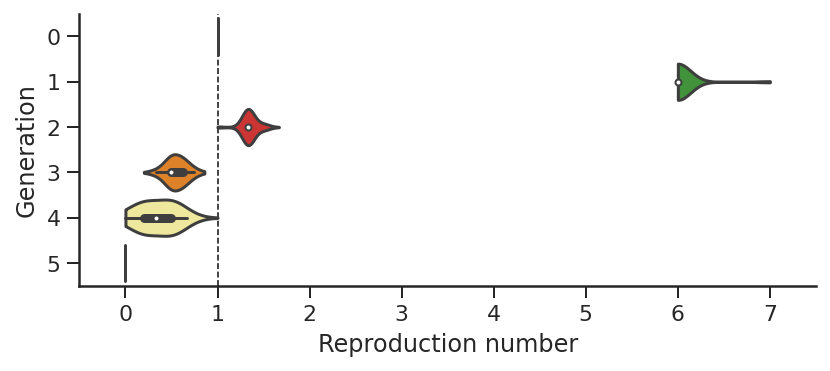

In [43]:
from matplotlib.colors import LinearSegmentedColormap

# via https://stackoverflow.com/questions/18926031/how-to-extract-a-subset-of-a-colormap-as-a-new-colormap-in-matplotlib
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

pllt = matplotlib.cm.get_cmap('Paired_r', 256)
# pllt = truncate_colormap(pllt, 1./12, 1)
cm_pllt = LinearSegmentedColormap.from_list(
        'cmap_', [pllt(x/12.) for x in np.arange(0,11)][::-1], N=120)
get_clr = lambda x: cm_pllt((x-1)/5.)

colors = [get_clr(x) for x in np.arange(1,7)]

fig, ax = plt.subplots()
fig.set_size_inches(6.6,2.5); 

dfReff_by_gen = pd.DataFrame(Reff_by_gen,columns = ['%d'%(i) for i in range(GEN_MAX)])
sns.violinplot(x = "value", y = "variable", data = dfReff_by_gen.melt(), ax = ax, 
               scale='width', bw=.8, cut=0, orient='h', palette=colors)
ax.set_xlim(left = -.5, right=7.5)
ax.set_xlabel("Reproduction number"); ax.set_ylabel("Generation")
ax.axvline(1, color='k', lw=.8, ls='dashed', zorder=-5);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);

my_dpi = 300
!mkdir -p ../../figures/draft
plt.savefig("../../figures/draft/AppendixFigure3.pdf",
            format='pdf',
            dpi=my_dpi,
            bbox_inches='tight');

In [18]:
datemin = pd.to_datetime("2020-12-24", format = "%Y-%m-%d")
df_IDs['date'] = [datemin + pd.DateOffset(x, 'days') for x in df_IDs['day']]
df_IDs

,number,ID,day,date
0,1,A0,5,2020-12-29
1,2,B1.1,15,2021-01-08
2,3,B1.2,16,2021-01-09
3,4,B2,21,2021-01-14
4,5,B3,23,2021-01-16
5,6,B4.1,21,2021-01-14
6,7,B4.2,21,2021-01-14
7,8,B4.3,25,2021-01-18
8,9,B5,24,2021-01-17
9,10,B6,23,2021-01-16


In [19]:
intervention_date = pd.to_datetime('2021-01-11', format="%Y-%m-%d")
intervention_day = int((intervention_date - datemin) / np.timedelta64(1, 'D'))
intervention_day

18

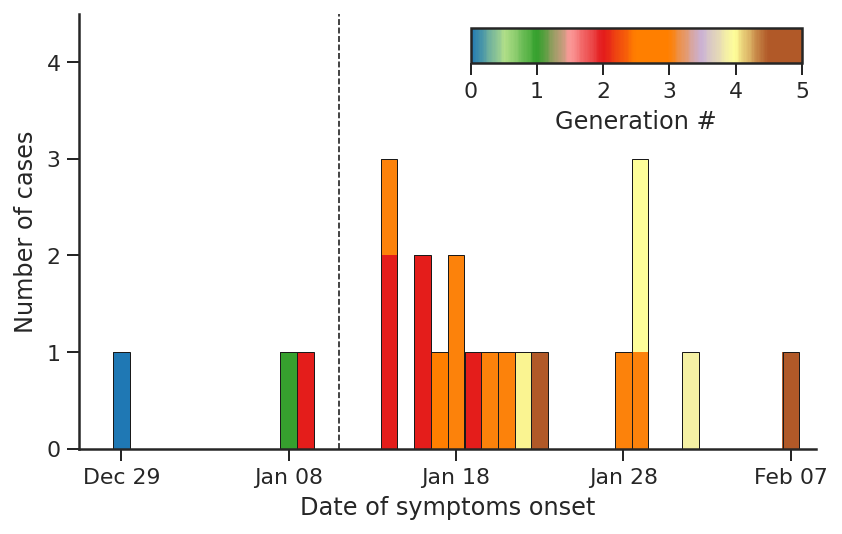

In [42]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, ax = plt.subplots()
fig.set_size_inches(6.6,4); 

bins_number = max(df_IDs['day'])+2
n_infections, edges = np.histogram(df_IDs['day'], bins=bins_number, range=(-1, max(df_IDs['day'])+1))
timepoints = edges[:-1]
ax.bar(timepoints, n_infections, lw = 0.5, width = (edges[1]-edges[0])*.99, edgecolor = 'k', color='None')
ymax = int(max(n_infections))+.5

n_infections_previous = None
for key, group in df_IDs.merge(dfReff.reset_index()).sort_values(['day','mean_gen']).groupby('mean_gen'):
    if n_infections_previous is None:
        n_infections_previous = np.zeros_like(n_infections)
    else:
        n_infections_previous += n_infections
    n_infections, edges = np.histogram(group['day'], bins=bins_number, range=(-1, max(df_IDs['day'])+1), density=False)
    ax.bar(timepoints, n_infections, lw = 0.5, edgecolor='None', width = (edges[1]-edges[0]), 
           bottom = n_infections_previous, zorder=-1, color=get_clr(key))
xstep = 10
xtks = np.arange(5,max(df_IDs['day'])+xstep,xstep)
ax.set_ylim(top=ymax+1)
ax.set_yticks(np.arange(0,ymax+1,1))
ax.set_xticks(xtks)
ax.set_xlim(2.5,max(xtks)+1.5)
ax.set_xticklabels(format(datemin+pd.DateOffset(int(x),'days'), "%b %d") for x in xtks)
ax.set_xlabel('Date of symptoms onset'); ax.set_ylabel('Number of cases')


[ax.axvline(x, color='k', lw=.8, ls='dashed', zorder=-5) for x in [intervention_day]]


ax_ = inset_axes(ax, width="45%", height="8%", loc='upper right')
norm = matplotlib.colors.Normalize(vmin=0, vmax=5)
cb1 = matplotlib.colorbar.ColorbarBase(ax_, 
                                cmap=truncate_colormap(cm_pllt, 0, 1),
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('Generation #')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);

plt.savefig("../../figures/draft/AppendixFigure4.pdf",
            format='pdf',
            dpi=my_dpi,
            bbox_inches='tight');